## Proprietà dell'acqua

Proprietà dell'acqua in fase gassosa e liquida. Dati dal sito del NIST (National Instutute of Standards and Technology) https://webbook.nist.gov/chemistry/fluid/.

In [2]:
import numpy

data = {}
header = open('water/T750.txt').readline().strip().split('\t')
for T in [750, 647, 643, 600, 550]:
    data[T] = numpy.loadtxt('water/T{}.txt'.format(T), skiprows=1, unpack=True, converters={-1: lambda x: 0})

### Limiti di validità dell'equazione dei gas perfetti
Testiamo i limiti di validità dell'equazione di stato dei gas perfetti: 

- in quale range di pressione, temperatura e densità fornisce una buona descrizione delle proprietà del vapore d'acqua?
- cosa succede a bassa temperatura?

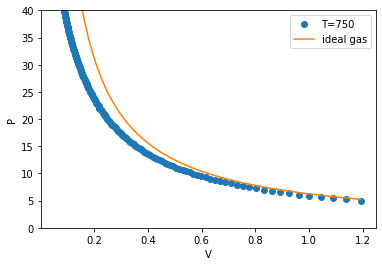

In [3]:
from matplotlib import pyplot as plt

import matplotlib
#matplotlib.rcParams['figure.figsize'] = [7, 7]
#matplotlib.rcParams['figure.dpi'] = 72
#matplotlib.rcParams['font.size'] = 14

def pressure_ideal_gas(V, T, n=1.0):
    R = 8.314
    return n * R * T / V
    
plt.ylim(0, 40)
plt.xlabel('V')
plt.ylabel('P')
T = 750
plt.plot(data[T][3], data[T][1], 'o', label='T=750')
plt.plot(data[T][3], 1e-6 * pressure_ideal_gas(1e-3 * data[T][3], T), label='ideal gas')
plt.legend()

### Equazione di stato di van der Waals 


$$
(P+a\frac{n^2}{V^2})(V-nb) = nR T
$$
Valori delle costanti $a$ e $b$ https://en.wikipedia.org/wiki/Van_der_Waals_constants_(data_page)

- implementa $P(V,T)$ secondo l'equazione di stato di van der Waals
- usa i valori di $a$ e $b$ adatti per l'acqua (in unità SI)

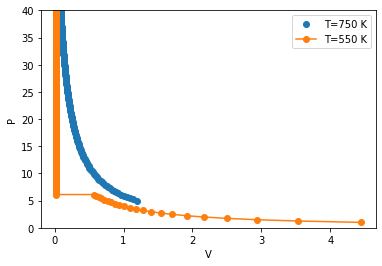

In [11]:
from matplotlib import pyplot as plt

def pressure_vdw(V, T, a=5.536e-1, b=0.03049e-3, n=1.0):
    R = 8.314
    # TODO: return vdw expression for P
    return (n * R * T) / (V - n * b) - a * (n / V)**2

plt.ylim(0, 40)
#plt.xlim(0, 2)
plt.xlabel('V')
plt.ylabel('P')

T=750
plt.plot(data[T][3], data[T][1], 'o', label='T={} K'.format(T))
#plt.plot(data[T][3], 1e-6 * pressure_vdw(1e-3 * data[T][3], T), label='vdw')
T=550
plt.plot(data[T][3], data[T][1], '-o', label='T={} K'.format(T))
plt.legend()

### Curva di coesistenza
I files `water/saturation*.txt` contengono la pressione di coesistenza liquido-gas $P_{eq}(T)$ per l'acqua in diversi regimi di temperatura
- Quale forma funzionale potrebbe descrivere bene i dati?

In [12]:
from matplotlib import pyplot as plt
import matplotlib
import numpy

data = {}
header = open('water/saturation_med.txt').readline().strip().split('\t')
data_med = numpy.loadtxt('water/saturation_med.txt', skiprows=1, unpack=True)
data_low = numpy.loadtxt('water/saturation_low.txt', skiprows=1, unpack=True)

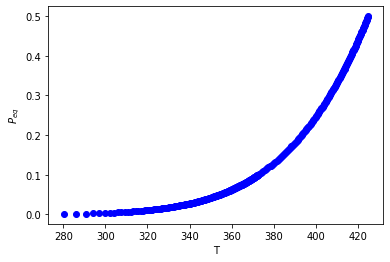

In [13]:
from matplotlib import pyplot as plt

plt.xlabel('T')
plt.ylabel('$P_{eq}$')
plt.plot(data_med[0], data_med[1], 'o', color='b')
plt.plot(data_low[0], data_low[1], 'o', color='b')

Diagramma di fase dell'acqua (source: https://commons.wikimedia.org/wiki/File:Phase_diagram_of_water.svg)
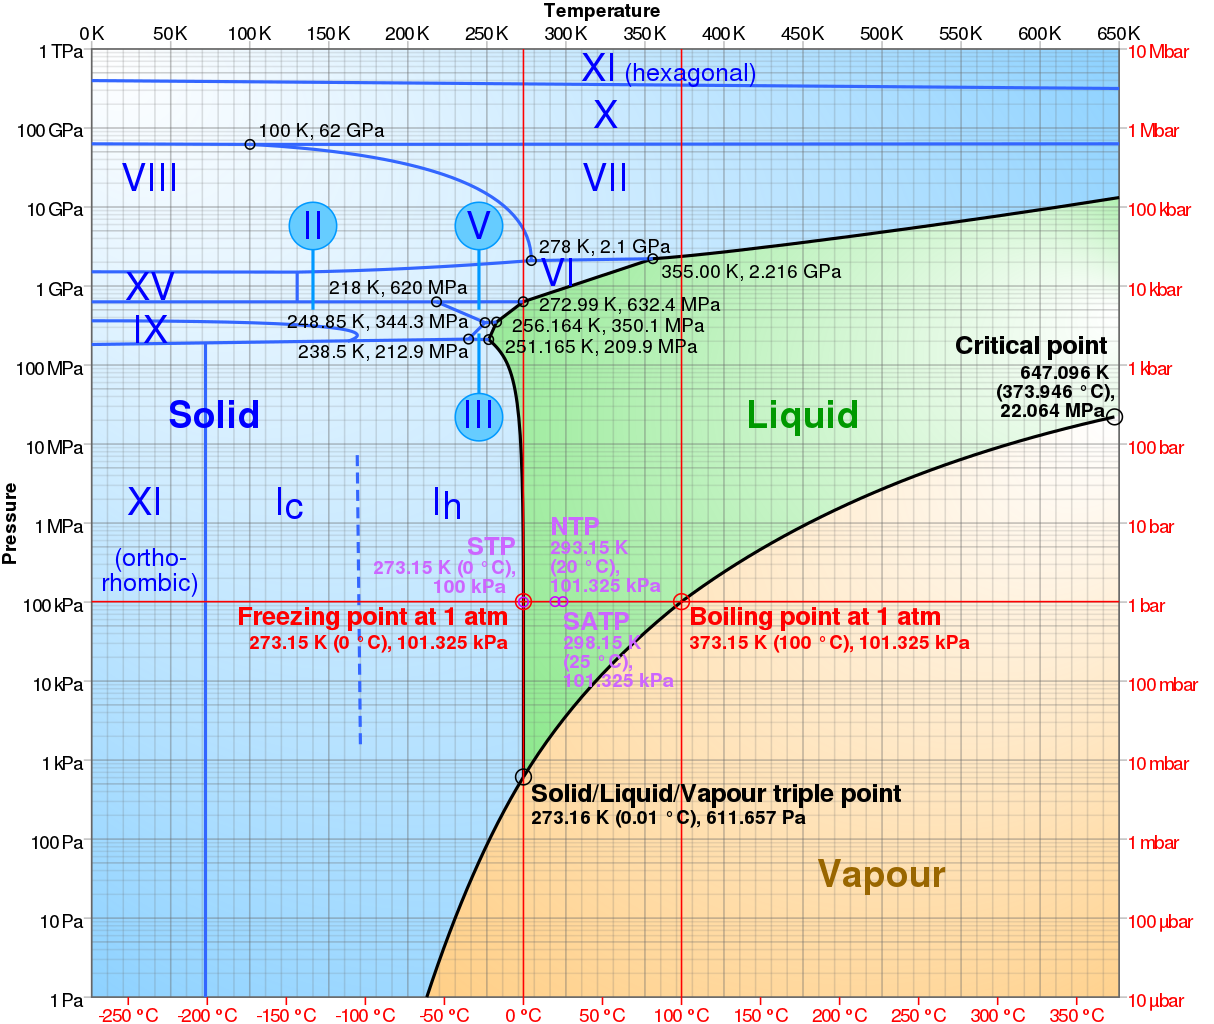